# Time series neural network

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\f

In [2]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import preprocessing

### Data preprocessing

In [329]:
# Data preparation
df = pd.read_csv(r'time_series_pi_added.csv')
df

,hour_t0,temp_pi_t0,hum_pi_t0,wind_speed_t0,wind_direction_t0,precip_t0,temp_blue_t0,hum_blue_t0,PM2.5_pi_t0,PM10_pi_t0,...,hum_pi_t5,wind_speed_t5,wind_direction_t5,precip_t5,temp_blue_t5,hum_blue_t5,PM2.5_pi_t5,PM10_pi_t5,PM2.5_pi,PM10_pi
0,9.0,8.316667,53.283333,5.116561,50.71060,0.0,3.106314,76.0,11.798333,17.710000,...,30.933333,9.826088,61.557068,0.0,10.446314,37.0,9.652500,15.223333,6.641000,9.477000
1,12.0,18.650000,30.083333,6.952755,68.74950,0.0,8.656314,48.0,6.064167,8.284167,...,40.350000,7.754637,68.198590,0.0,11.096313,35.0,6.040000,9.553333,7.147500,10.535000
2,15.0,13.990000,35.770000,8.209263,52.12500,0.0,10.976314,36.0,6.641000,9.477000,...,49.616667,7.895416,204.227750,0.0,7.396314,52.0,8.685833,12.543333,8.777500,13.442500
3,18.0,10.425000,42.900000,6.162207,83.29016,0.0,10.686314,37.0,7.147500,10.535000,...,61.908333,5.692100,161.565050,0.0,4.356314,63.0,9.979167,14.669167,7.956667,10.690833
4,21.0,7.566667,53.983333,6.849467,176.98721,0.0,5.866314,57.0,8.777500,13.442500,...,66.109091,4.510787,151.389540,0.0,3.156313,54.0,12.583636,18.430000,13.833333,20.941667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,23.0,6.787500,58.587500,7.636753,171.86990,0.0,2.596313,52.0,8.486250,14.362500,...,61.616667,4.735060,171.253850,0.0,-0.823686,75.0,7.600000,11.365833,5.475556,8.303333
134,2.0,5.500000,61.180000,5.860375,169.38034,0.0,1.036314,58.0,5.630000,9.211000,...,55.350000,4.024922,190.304840,0.0,4.826314,50.0,7.712500,10.448333,4.786250,7.621250
135,5.0,4.850000,62.908333,4.680000,180.00000,0.0,-0.543686,68.0,8.113333,12.313333,...,30.958333,9.339208,242.447190,0.0,12.706313,31.0,5.928333,8.614167,5.369000,8.341000
136,8.0,8.858333,44.375000,5.191994,213.69006,0.0,8.576314,39.0,8.003333,13.353333,...,21.891667,14.400000,233.130100,0.0,15.826314,28.0,8.453333,14.123333,3.553750,5.736250


In [330]:
# missing data drop
df.iloc[67:81, :]
df = df.drop(df.index[67:81])

In [331]:
df.columns

Index(['hour_t0', 'temp_pi_t0', 'hum_pi_t0', 'wind_speed_t0',
       'wind_direction_t0', 'precip_t0', 'temp_blue_t0', 'hum_blue_t0',
       'PM2.5_pi_t0', 'PM10_pi_t0', 'hour_t1', 'temp_pi_t1', 'hum_pi_t1',
       'wind_speed_t1', 'wind_direction_t1', 'precip_t1', 'temp_blue_t1',
       'hum_blue_t1', 'PM2.5_pi_t1', 'PM10_pi_t1', 'hour_t2', 'temp_pi_t2',
       'hum_pi_t2', 'wind_speed_t2', 'wind_direction_t2', 'precip_t2',
       'temp_blue_t2', 'hum_blue_t2', 'PM2.5_pi_t2', 'PM10_pi_t2', 'hour_t3',
       'temp_pi_t3', 'hum_pi_t3', 'wind_speed_t3', 'wind_direction_t3',
       'precip_t3', 'temp_blue_t3', 'hum_blue_t3', 'PM2.5_pi_t3', 'PM10_pi_t3',
       'hour_t4', 'temp_pi_t4', 'hum_pi_t4', 'wind_speed_t4',
       'wind_direction_t4', 'precip_t4', 'temp_blue_t4', 'hum_blue_t4',
       'PM2.5_pi_t4', 'PM10_pi_t4', 'hour_t5', 'temp_pi_t5', 'hum_pi_t5',
       'wind_speed_t5', 'wind_direction_t5', 'precip_t5', 'temp_blue_t5',
       'hum_blue_t5', 'PM2.5_pi_t5', 'PM10_pi_t5', 'PM2.5_p

In [332]:
labels = ['PM2.5_pi', 'PM10_pi'] # targets

In [333]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
test_df = df[-int(n*0.2):]

num_features = df.shape[1]

In [334]:
X_train = train_df.drop(labels, axis=1)
X_test = test_df.drop(labels, axis=1)

In [335]:
y_train1 = train_df[labels[0]] # PM 2.5
y_train2 = train_df[labels[1]] # PM 10

y_true1 = test_df[labels[0]]
y_true2 = test_df[labels[1]]

## PM2.5


### Simple RNN

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [337]:
input_layer = Input(shape=(X.shape[1],))
rnn_layer = tf.keras.layers.SimpleRNN(128)
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

rnn_model = Model(inputs=input_layer, outputs=output)
rnn_model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [342]:
history = rnn_model.fit(X_train, y_train1, batch_size=2, epochs=100, verbose=1, validation_split=0.05)

Train on 94 samples, validate on 5 samples
Epoch 1/100
94/94 [==============================] - 0s 1ms/sample - loss: 4.9509 - mean_squared_error: 4.9509 - val_loss: 9.0920 - val_mean_squared_error: 9.0920
Epoch 2/100
94/94 [==============================] - 0s 1ms/sample - loss: 3.0705 - mean_squared_error: 3.0705 - val_loss: 1.4624 - val_mean_squared_error: 1.4624
Epoch 3/100
94/94 [==============================] - 0s 1ms/sample - loss: 1.2418 - mean_squared_error: 1.2418 - val_loss: 1.4479 - val_mean_squared_error: 1.4479
Epoch 4/100
94/94 [==============================] - 0s 1ms/sample - loss: 0.9960 - mean_squared_error: 0.9960 - val_loss: 3.2082 - val_mean_squared_error: 3.2082
Epoch 5/100
94/94 [==============================] - 0s 1ms/sample - loss: 0.7076 - mean_squared_error: 0.7076 - val_loss: 3.7673 - val_mean_squared_error: 3.7673
Epoch 6/100
94/94 [==============================] - 0s 1ms/sample - loss: 0.5245 - mean_squared_error: 0.5245 - val_loss: 2.2186 - val_mean_s

In [343]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = rnn_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train1,pred_train)))

pred = rnn_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_true1,pred)))

y_pred1 = pred

0.4108774173519691
2.0257509639241484


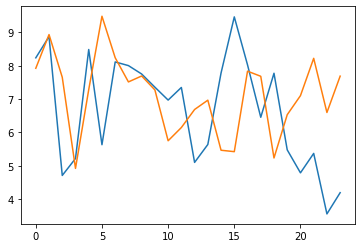

In [344]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

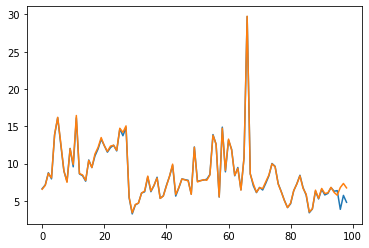

In [345]:
plt.plot(np.arange(len(y_train1)), y_train1)
plt.plot(np.arange(len(pred_train)), pred_train)
plt.show()

### LSTM

In [346]:
input_layer = Input(shape=(X.shape[1],))
lstm_layer = tf.keras.layers.LSTM(128, return_sequences=True)
dense_layer_1 = Dense(200, activation='relu')(input_layer)
dense_layer_2 = Dense(100, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(50, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(25, activation='relu')(dense_layer_3)
output = Dense(1)(dense_layer_4)

lstm_model = Model(inputs=input_layer, outputs=output)
lstm_model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [355]:
history2 = lstm_model.fit(X_train, y_train1, batch_size=1, epochs=100, verbose=1, validation_split=0.05)

Train on 94 samples, validate on 5 samples
Epoch 1/100
94/94 [==============================] - 0s 3ms/sample - loss: 1.1734 - mean_squared_error: 1.1734 - val_loss: 3.2041 - val_mean_squared_error: 3.2041
Epoch 2/100
94/94 [==============================] - 0s 3ms/sample - loss: 0.3902 - mean_squared_error: 0.3902 - val_loss: 2.5069 - val_mean_squared_error: 2.5069
Epoch 3/100
94/94 [==============================] - 0s 3ms/sample - loss: 0.4041 - mean_squared_error: 0.4041 - val_loss: 3.1570 - val_mean_squared_error: 3.1570
Epoch 4/100
94/94 [==============================] - 0s 3ms/sample - loss: 0.3387 - mean_squared_error: 0.3387 - val_loss: 4.1358 - val_mean_squared_error: 4.1358
Epoch 5/100
94/94 [==============================] - 0s 3ms/sample - loss: 0.1584 - mean_squared_error: 0.1584 - val_loss: 4.5609 - val_mean_squared_error: 4.5609
Epoch 6/100
94/94 [==============================] - 0s 3ms/sample - loss: 0.3137 - mean_squared_error: 0.3137 - val_loss: 3.7856 - val_mean_s

In [356]:
pred_train = lstm_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train1,pred_train)))

pred = lstm_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_true1,pred)))

y_pred1 = pred

0.5403693032010389
1.8382226930064924


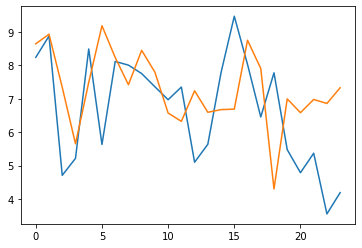

In [358]:
# MSE = 1.8382226930064924

plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

In [353]:
pred_train = lstm_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train1,pred_train)))

pred = lstm_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_true1,pred)))

y_pred1 = pred

1.5894989134328414
2.182639010526818


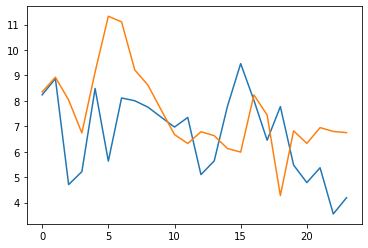

In [354]:
# MSE = 2.182639010526818
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

### Without time blocks

In [273]:
# Data preparation
df2 = pd.read_csv(r'C:\Users\ay0un\Desktop\ds-project\buenos-aires\Air-Quality-Forecast-Challenge\1h_sampled_data.csv')

In [274]:
df2.head()

,time,temp_pi,hum_pi,PM1_pi,PM2.5_pi,PM10_pi,temp_blue,precip,hum_blue,wind_speed,...,hum_sbs,wind,pressure,PM2.5,PM10,AQI,sunrise,noon,sunset,daylight
0,2021-03-23 10:00:00+01:00,8.316667,53.283333,6.042500,11.798333,17.710000,3.106314,0.0,76.0,5.116561,...,65.0,3.7,1025.0,16.0,24.3,59.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
1,2021-03-23 11:00:00+01:00,13.408333,38.358333,4.840833,10.010000,15.388333,5.416314,0.0,67.0,6.924738,...,65.0,3.7,1025.0,14.0,20.9,55.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
2,2021-03-23 12:00:00+01:00,17.391667,32.191667,5.140833,7.510833,9.632500,7.216313,0.0,55.0,7.421590,...,57.0,14.8,1025.0,12.0,17.3,50.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
3,2021-03-23 13:00:00+01:00,18.650000,30.083333,3.752500,6.064167,8.284167,8.656314,0.0,48.0,6.952755,...,57.0,14.8,1025.0,NaN,NaN,27.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414
4,2021-03-23 14:00:00+01:00,19.983333,28.125000,4.610000,10.042500,15.750000,9.586313,0.0,39.0,11.269782,...,40.0,11.1,1025.0,11.0,16.2,45.0,2021-03-23 06:22:52.709917+01:00,2021-03-23 12:32:27+01:00,2021-03-23 18:42:36.960331+01:00,0 days 12:19:44.250414


In [275]:
df2['time'] = pd.to_datetime(df2['time'], utc=True)

In [276]:
hours = df2['time'].dt.hour
df2['hour'] = hours

In [277]:
df2.columns

Index(['time', 'temp_pi', 'hum_pi', 'PM1_pi', 'PM2.5_pi', 'PM10_pi',
       'temp_blue', 'precip', 'hum_blue', 'wind_speed', 'wind_direction',
       'cloud_cover', 'date', 'temp_sbs', 'hum_sbs', 'wind', 'pressure',
       'PM2.5', 'PM10', 'AQI', 'sunrise', 'noon', 'sunset', 'daylight',
       'hour'],
      dtype='object')

In [278]:
df2 = df2[['hour','temp_pi', 'hum_pi', 'wind_speed', 'wind_direction', 'precip', 'temp_blue', 'hum_blue', 'PM2.5_pi', 'PM10_pi']]

In [279]:
df2.dropna()

,hour,temp_pi,hum_pi,wind_speed,wind_direction,precip,temp_blue,hum_blue,PM2.5_pi,PM10_pi
0,9,8.316667,53.283333,5.116561,50.710600,0.0,3.106314,76.0,11.798333,17.710000
1,10,13.408333,38.358333,6.924738,62.102737,0.0,5.416314,67.0,10.010000,15.388333
2,11,17.391667,32.191667,7.421590,67.166336,0.0,7.216313,55.0,7.510833,9.632500
3,12,18.650000,30.083333,6.952755,68.749500,0.0,8.656314,48.0,6.064167,8.284167
4,13,19.983333,28.125000,11.269782,63.434950,0.0,9.586313,39.0,10.042500,15.750000
...,...,...,...,...,...,...,...,...,...,...
480,8,5.350000,77.241667,16.935310,2.436646,1.2,1.286314,93.0,6.740000,10.450833
481,9,5.975000,75.625000,17.917007,22.442749,0.9,1.306313,92.0,3.617500,5.262500
482,10,6.372727,72.300000,13.684735,35.362457,0.8,1.426314,92.0,8.692727,13.842727
483,11,6.641667,71.333333,13.608762,37.476166,0.4,2.436314,83.0,9.065833,13.411667


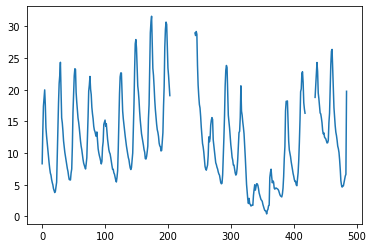

In [280]:
plt.plot(df2['temp_pi'])
plt.show()

In [295]:
temp = []

In [296]:
for i in range(len(df2)):
    if pd.isna(df2.iloc[i, -1]):
        temp += [i]


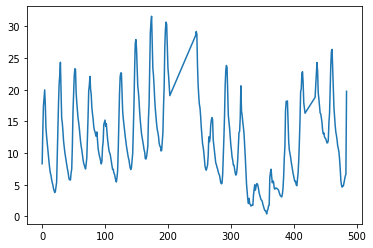

In [309]:
plt.plot(df2['temp_pi'])
plt.show()

In [312]:
column_indices = {name: i for i, name in enumerate(df2.columns)}

n = len(df2)
train_df2 = df2[0:int(n*0.8)]
test_df2 = df2[-int(n*0.2):]

num_features = df2.shape[1]

In [314]:
labels = ['PM2.5_pi', 'PM10_pi'] # targets

In [315]:
X_train = train_df2.drop(labels, axis=1)
X_test = test_df2.drop(labels, axis=1)

In [316]:
y_train1 = train_df2[labels[0]] # PM 2.5
y_train2 = train_df2[labels[1]] # PM 10

y_true1 = test_df2[labels[0]]
y_true2 = test_df2[labels[1]]

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [325]:
input_layer = Input(shape=(X_train.shape[1],))
rnn_layer = tf.keras.layers.SimpleRNN(128)
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

rnn_model = Model(inputs=input_layer, outputs=output)
rnn_model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [326]:
history = rnn_model.fit(X_train, y_train1, batch_size=4, epochs=100, verbose=1, validation_split=0.2)

Train on 274 samples, validate on 69 samples
Epoch 1/100
274/274 [==============================] - 1s 3ms/sample - loss: 61.5811 - mean_squared_error: 61.5811 - val_loss: 30.2023 - val_mean_squared_error: 30.2023
Epoch 2/100
274/274 [==============================] - 0s 578us/sample - loss: 17.2351 - mean_squared_error: 17.2351 - val_loss: 17.2119 - val_mean_squared_error: 17.2119
Epoch 3/100
274/274 [==============================] - 0s 584us/sample - loss: 13.4381 - mean_squared_error: 13.4381 - val_loss: 18.6769 - val_mean_squared_error: 18.6768
Epoch 4/100
274/274 [==============================] - 0s 668us/sample - loss: 11.6452 - mean_squared_error: 11.6452 - val_loss: 14.1509 - val_mean_squared_error: 14.1509
Epoch 5/100
274/274 [==============================] - 0s 850us/sample - loss: 10.6450 - mean_squared_error: 10.6450 - val_loss: 14.6455 - val_mean_squared_error: 14.6455
Epoch 6/100
274/274 [==============================] - 0s 770us/sample - loss: 9.6559 - mean_squared_e

In [327]:
pred_train = rnn_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train1,pred_train)))

pred = rnn_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_true1,pred)))

y_pred1 = pred

2.2341302342420475
6.199050248029855


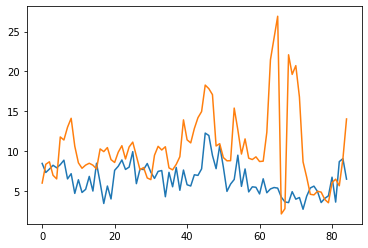

In [328]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()